In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import modules as ms

In [2]:
lrad = ms.LRGRad()

In [3]:
# observed
mag_bins = np.array([4., 5., 6., 7.] + np.arange(7.5, 18.5, 0.5).tolist())

radii_north = [1600., 1200., 1000., 600., 400., 310., 300., 290., 250., 180., 
         120., 110., 80., 60., 30., 29., 40., 30., 30., 25., 
          20., 15., 12., 10., 10., 9.]

radii_south = [1600., 500., 400., 300., 220., 200., 190., 150., 120., 100., 
         75., 60., 50., 40., 35., 30., 25., 22., 20., 20., 20., 15., 12., 10.,
         9., 7.5]

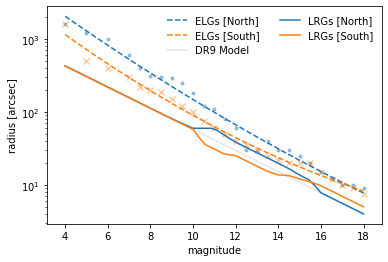

In [4]:
fg, ax = plt.subplots()


mag = np.linspace(4., 18.)

ax.plot(mag, ms.mag2rad_north(mag), 'C0--', label='ELGs [North]')
ax.plot(mag, ms.mag2rad_south(mag), 'C1--', label='ELGs [South]')
ax.plot(mag, ms.mag2r_old(mag), ls='-', label='DR9 Model', color='grey', alpha=0.2)


# scatter
ax.scatter(mag_bins, radii_north, marker='.', color='C0', alpha=0.4)
ax.scatter(mag_bins, radii_south, marker='x', color='C1', alpha=0.4)


ax.plot(mag, lrad.f_radius_north(mag), 'C0-', label='LRGs [North]')
ax.plot(mag, lrad.f_radius_south(mag), 'C1-', label='LRGs [South]')

ax.set(ylabel='radius [arcsec]', xlabel='magnitude',
       yscale='log')
ax.legend(frameon=False, ncol=2)


fg.savefig('rad_mag_north_south.png', dpi=300, bbox_inches='tight')

In [11]:
gaia_mag_list = np.array([-np.inf, 4., 5., 6., 7.] + np.arange(7.5, 18.5, 0.5).tolist())

In [12]:
gaia_mag_list[5:7]

array([7.5, 8. ])

In [13]:
fl = np.load(f'dens_elg_gaia_gmag_5_north.npz')
fl.files

['bins', 'density', 'density_ran', 'counts_ran', 'sf', 'reldens']

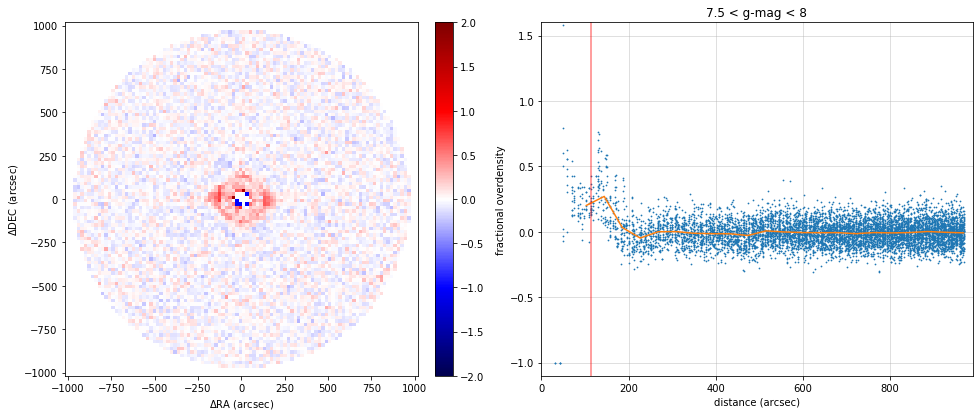

In [24]:
ax, _ = ms.relative_density_subplots(fl['bins'], fl['density'], fl['density_ran']*fl['sf'], 
                          nbins=101, vmin=-2, vmax=2,
                          xlabel1='$\Delta$RA (arcsec)', ylabel1='$\Delta$DEC (arcsec)',
                          xlabel2='distance (arcsec)', ylabel2='fractional overdensity')
ax[1].set_title('7.5 < g-mag < 8')
ax[1].axvline(ms.mag2r_old(8.0), color='r', alpha=0.5)

In [15]:
fl_ = np.load(f'dens_elg_gaia_gmag_5_north_after.npz')
fl_.files

['bins', 'density', 'density_ran', 'counts_ran', 'sf', 'reldens']

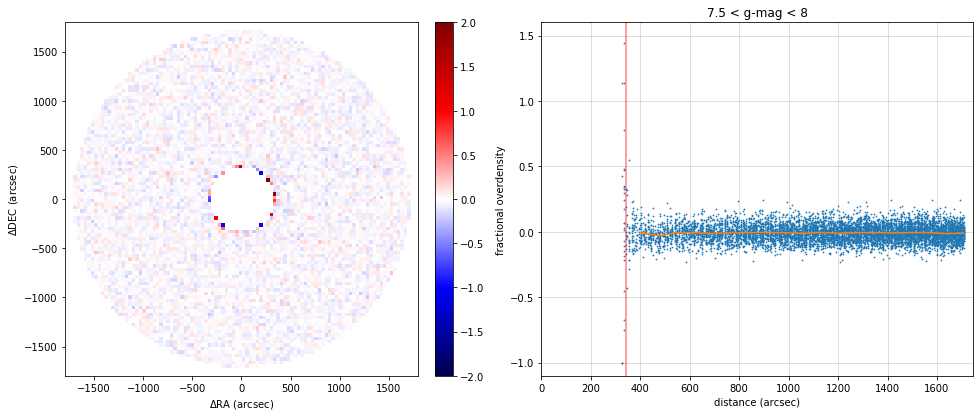

In [23]:
ax,__ = ms.relative_density_subplots(fl_['bins'], fl_['density'], fl_['density_ran']*fl_['sf'], 
                          nbins=101, vmin=-2, vmax=2,
                          xlabel1='$\Delta$RA (arcsec)', ylabel1='$\Delta$DEC (arcsec)',
                          xlabel2='distance (arcsec)', ylabel2='fractional overdensity')
ax[1].set_title('7.5 < g-mag < 8')

ax[1].axvline(ms.mag2rad_north(8.0), color='r', alpha=0.5)